### Machete Regresión Iniciación


### Dataset Calidad Vino

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en:

1. Generar dos casos benchmark para este dataset.\
1. Encontrar los mejores parámetros para profundidad y número de vecinos para un modelo de árbol de decisión y kNN, respectivamente. No te olvides de agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. 
1. Evaluar precisión, exhaustividad y F-Score para los modelos con los mejores hiperparámetros. Existen varias funciones de Scikit-Learn que puedes usar. Puedes consultar la información [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). Es importante que leas **detalladamente** la documentación de la función que elijas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Importamos el Dataset
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(dataset_url, sep=';')

In [5]:
# Importamos el Dataset
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


TODO: eleccion en una sola parte de la variable respusta

In [6]:
X = df.drop("quality", axis=1)
y = df.quality

1. **Casos Benchmark (Comparación)**

Predecimos que todos sobreviven

In [7]:
y_mean = df.quality.mean()

In [8]:
y_pred = [y_mean]*len(df)

In [9]:
print(r2_score(y, y_pred))

0.0


In [28]:
print(mean_squared_error(y, y_pred))

0.6517605398308277


2. **Separación - Entrenamiento del Modelo y evaluación**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

3. **Elección de Modelos**


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

clf_tree = DecisionTreeRegressor()
clf_knn = KNeighborsRegressor()

4. **Optimización de Párametros**

4.1 **Optimización para vecinos más cercanos**

In [21]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = mean_squared_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = mean_squared_error(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

TODO : Proponer una forma automatica de eleccion de hiperparametro

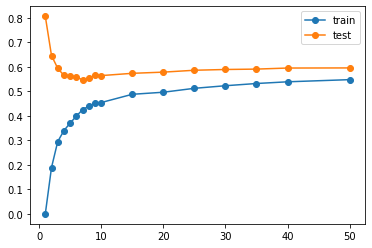

In [23]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

**Optimización para árboles**

In [24]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = mean_squared_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = mean_squared_error(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

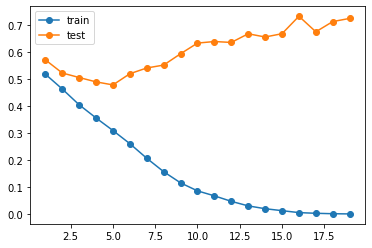

In [25]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()

5. **Evaluación del modelo**

Error cuadratico Medio

In [17]:
clf_tree_best = DecisionTreeRegressor(max_depth = 8)
clf_knn_best = KNeighborsRegressor(n_neighbors=5)

clf_tree_best.fit(X_train, y_train)
clf_knn_best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [18]:
from sklearn.metrics import mean_squared_error

**Para el modelo árbol**

In [19]:
y_test_pred = clf_tree_best.predict(X_test)

mean_squared_error(y_test, y_test_pred)

0.5661791276936439

**Para el modelo de vecinos**

In [26]:
y_test_pred = clf_knn_best.predict(X_test)

mean_squared_error(y_test, y_test_pred)

0.5624999999999999